In [1]:
using Paths, Plots
using LinearAlgebra

STEINER_POINTS = 2

function draw(nodeDict)
    nodes = [item.second for item in nodeDict]
    edges = []
    s = scatter(map(x -> x.position, nodes), legend=nothing)
    for node in nodes
    # node = nodeDict[(3.5, 3.5)]
        for neighbor in node.neighbors
            plot!([node.position[1], neighbor.node.position[1]], [node.position[2], neighbor.node.position[2]], arrow=true)
        end
    end
    display(s)
end

function scatterNodes(nodeDict)
    nodes = [item.second for item in nodeDict]
    positions = map(x -> x.position, nodes)
    s = scatter(positions, legend=nothing)
    return s
end


function drawPath(source, path, s)
    pos = map(x -> x.position, path)
    pos = vcat([source], pos)
    for i in 1:length(pos)-1
        plot!([pos[i][1], pos[i+1][1]], [pos[i][2], pos[i+1][2]])
    end
    display(s)
end

[ Info: Precompiling Paths [4a712326-4906-46e3-95f2-b945078f68f6] (cache misses: mismatched flags (16), include_dependency fhash change (2))


drawPath (generic function with 1 method)

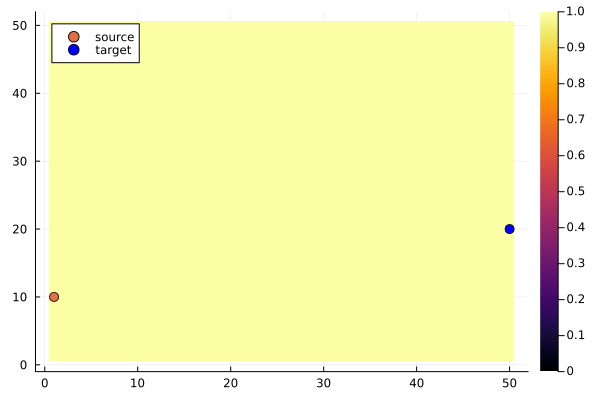

In [41]:
S = 50
costs = zeros(S, S).+1.0
source = (1.0, 10.0)
target = (S*1.0, 20.0)
h = heatmap(transpose(costs))
scatter!(source, label="source", ms=5)
scatter!(target, label="target", color="blue", ms=5)

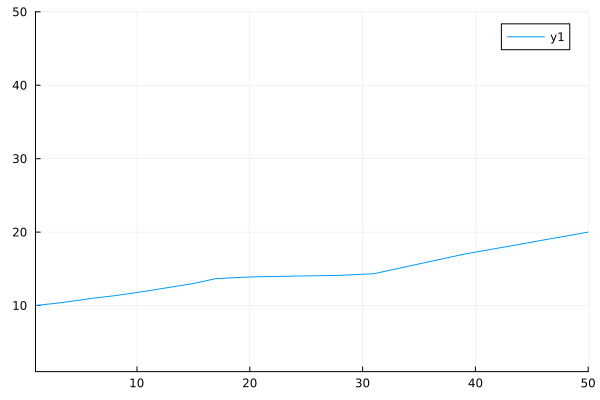

In [42]:
path, cost = Paths.shortestPathKanaiSuzuki(source, target, costs, steinerPoints=3)
plot([p[1] for p in path], [p[2] for p in path], xlim=(1, S), ylim=(1, S))

In [39]:
for p in path
    println(p)
end

(1.0, 10.0)
(2.0, 10.20060105184072)
(3.0, 10.40045078888054)
(4.0, 10.60030052592036)
(5.0, 10.80015026296018)
(6.0, 11.0)
(7.0, 11.20060105184072)
(8.0, 11.40045078888054)
(9.0, 11.60030052592036)
(10.0, 11.80015026296018)
(11.0, 12.0)
(12.0, 12.20060105184072)
(13.0, 12.40045078888054)
(14.0, 12.60030052592036)
(15.0, 12.80015026296018)
(16.0, 13.0)
(17.0, 13.20060105184072)
(18.0, 13.40045078888054)
(19.0, 13.60030052592036)
(20.0, 13.80015026296018)
(21.0, 14.0)
(22.0, 14.20060105184072)
(23.0, 14.40045078888054)
(24.0, 14.60030052592036)
(25.0, 14.80015026296018)
(26.0, 15.0)
(27.0, 15.20060105184072)
(28.0, 15.40045078888054)
(29.0, 15.60030052592036)
(30.0, 15.80015026296018)
(31.0, 16.0)
(32.0, 16.200601051840724)
(33.0, 16.40120210368144)
(34.0, 16.601803155522166)
(35.0, 16.801652892561982)
(35.99248685199098, 17.0)
(36.0, 17.001502629601802)
(37.0, 17.205108940646134)
(38.0, 17.408715251690456)
(39.0, 17.612321562734785)
(40.0, 17.81517655897821)
(40.90909090909091, 18.0)
(

In [8]:
nodeDict, nodesByFace = Paths.constructOriginalGraph(costs3)
neighbors = (n)->[(e.node, e.cost) for e in n.neighbors]
h = n->norm(n.position .- nodeDict[target].position)
sourceNode = nodeDict[source]
scatterNodes(nodeDict)

LoadError: UndefVarError: `constructOriginalGraph` not defined in `Paths`
Suggestion: check for spelling errors or missing imports.

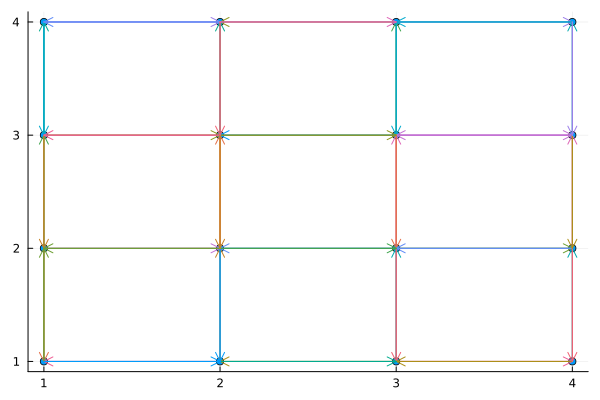

In [4]:
draw(nodeDict)

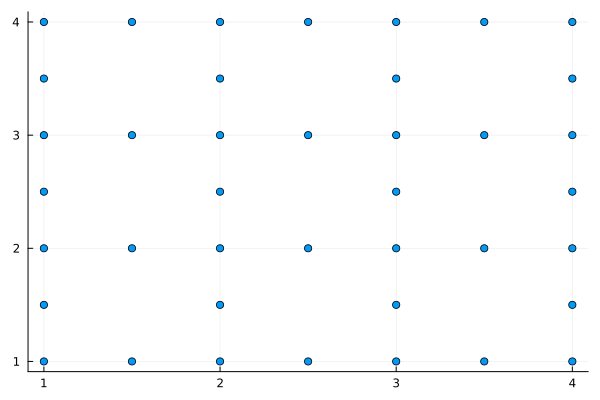

In [5]:
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
scatterNodes(nodeDict)

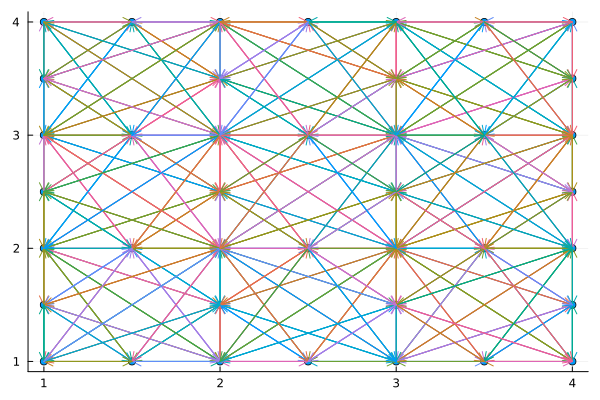

In [6]:
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)

#47 (generic function with 1 method)

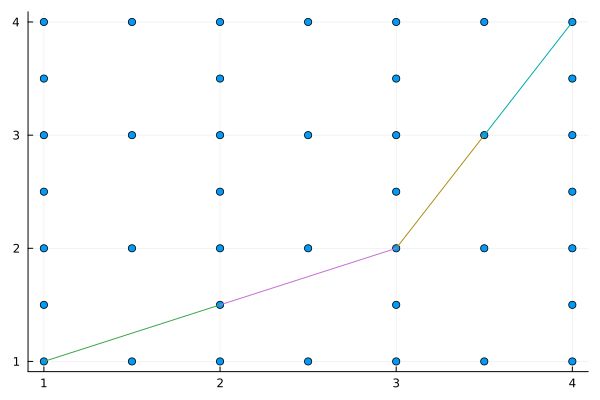

In [23]:
path, newPathCost = Paths.astar(sourceNode, nodeDict[target], neighbors, h)
s = scatterNodes(nodeDict)
drawPath(source, path, s)

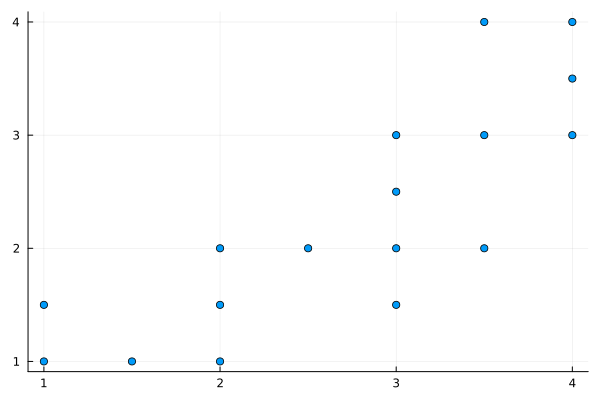

In [25]:
nodeDict = Paths.resetNodes(sourceNode, path)
scatterNodes(nodeDict)

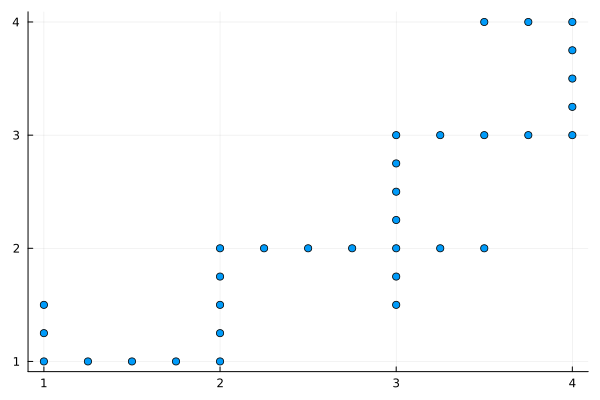

In [26]:
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))

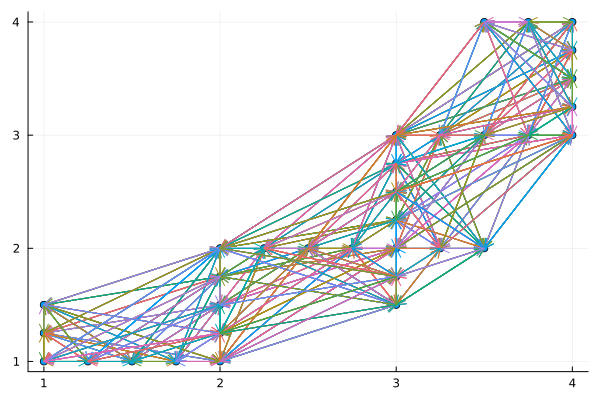

In [31]:
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)

In [33]:
nodeDict[(1.0, 1.0)]

Node((1.0, 1.0), Paths._Edge[->(2.0, 1.5), false, 2.23606797749979, ->(2.0, 2.0), false, 2.8284271247461903, ->(1.0, 1.25), true, 0.5, ->(1.25, 1.0), true, 0.5, ->(2.0, 1.5), false, 2.23606797749979, ->(2.0, 1.75), false, 2.5, ->(2.0, 2.0), false, 2.8284271247461903, ->(2.0, 1.25), false, 2.0615528128088303, ->(2.0, 1.5), false, 2.23606797749979, ->(2.0, 1.75), false, 2.5, ->(2.0, 2.0), false, 2.8284271247461903, ->(2.0, 1.25), false, 2.0615528128088303])

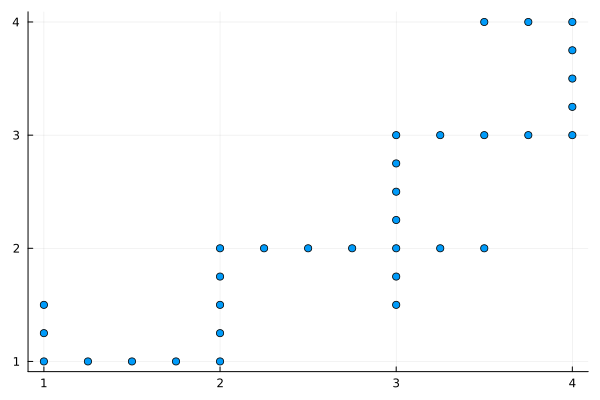

In [28]:
path, newPathCost = Paths.astar(sourceNode, nodeDict[target], neighbors, h)
drawPath(source, path, scatterNodes(nodeDict))

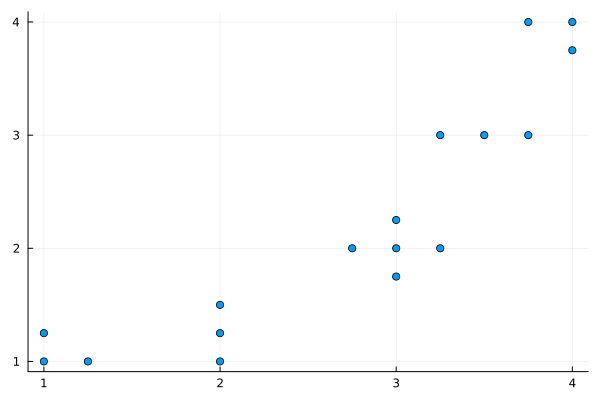

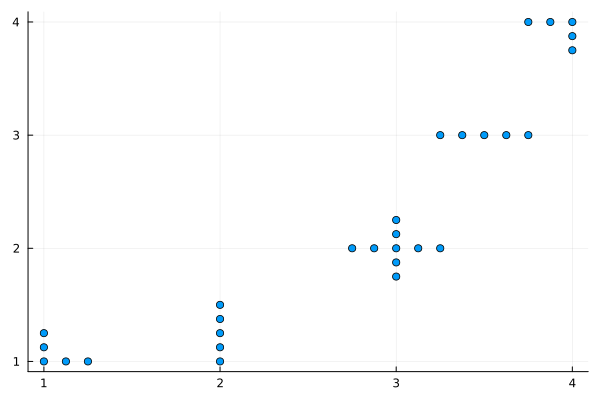

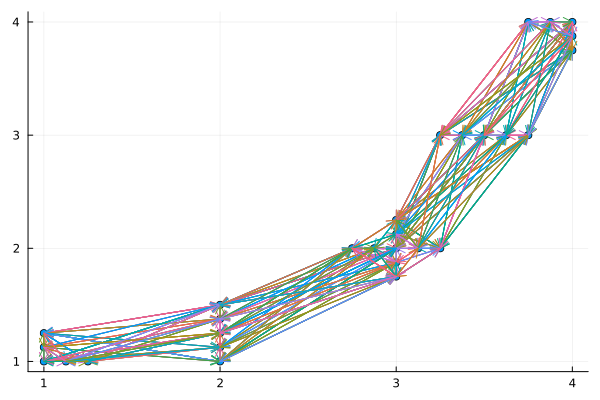

[ Info: queued: 173, popped: 54


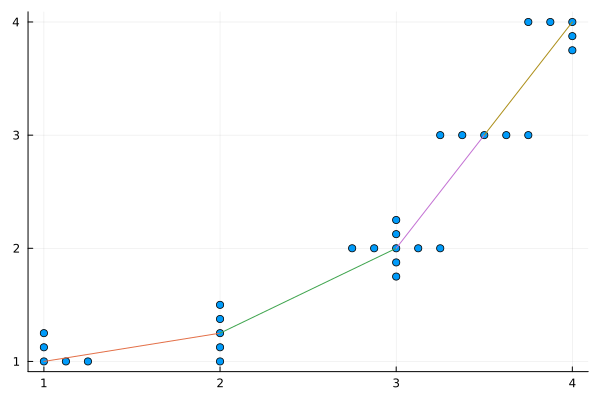

In [26]:
nodeDict = Paths.resetNodes(sourceNode, path)
display(scatterNodes(nodeDict))
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)
path = reverse(Paths.toArray(Paths.astar(sourceNode, nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))

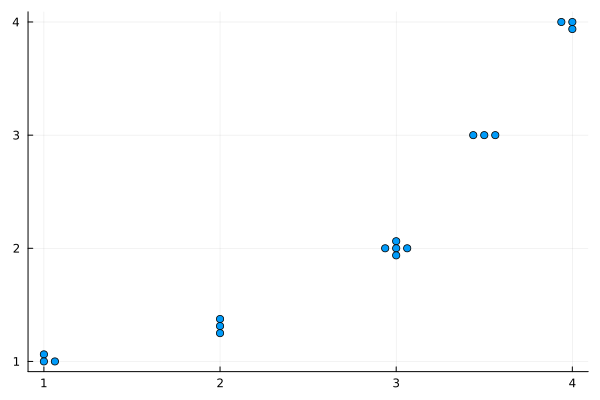

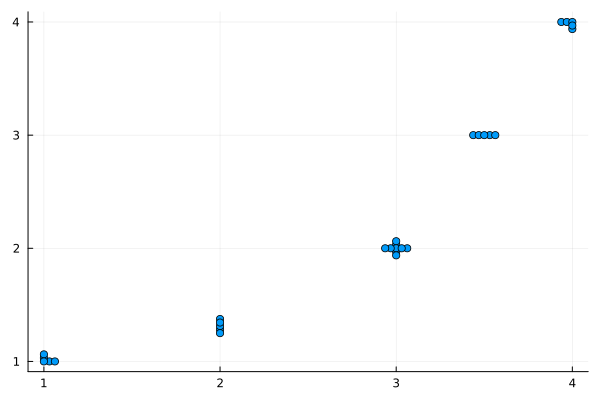

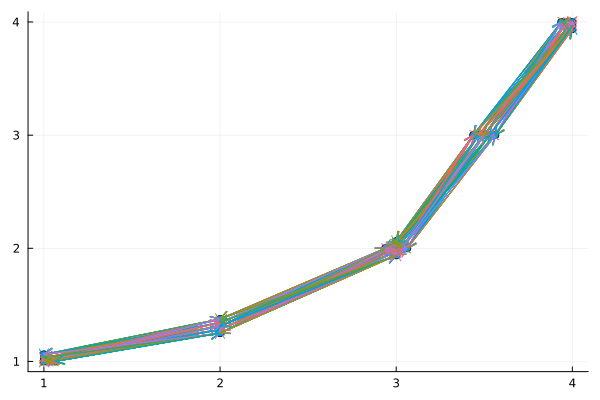

[ Info: queued: 214, popped: 80


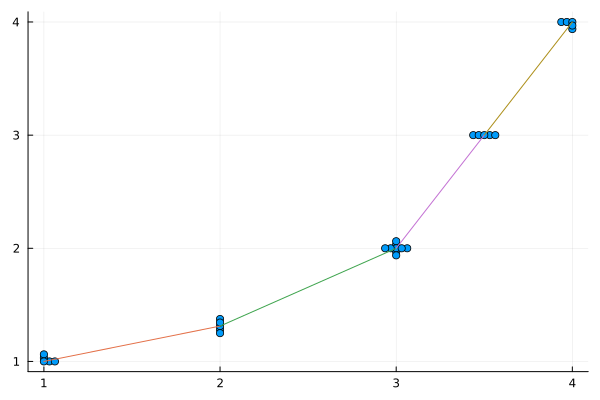

In [28]:
nodeDict = Paths.resetNodes(sourceNode, path)
display(scatterNodes(nodeDict))
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)
path = reverse(Paths.toArray(Paths.astar(sourceNode, nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))

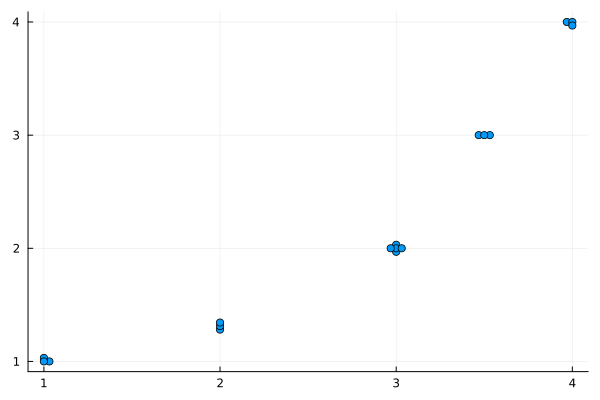

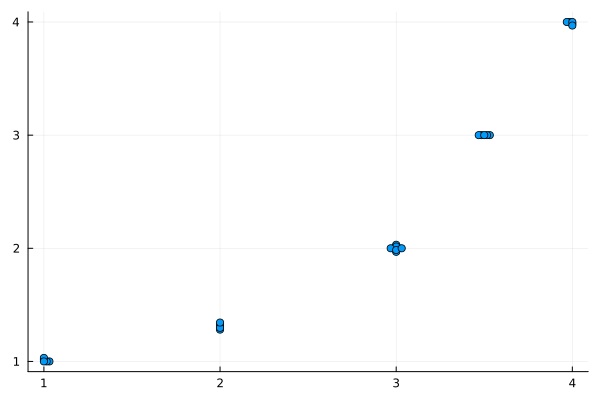

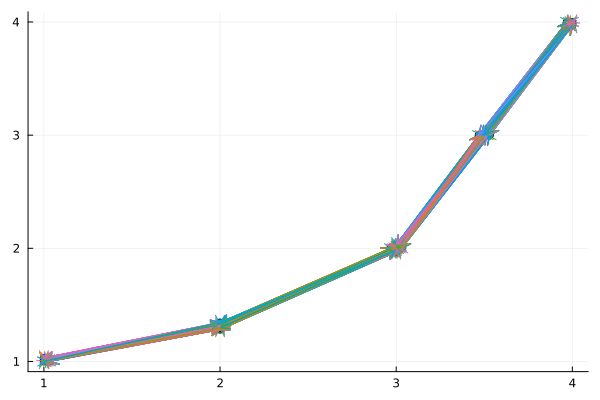

[ Info: queued: 209, popped: 80


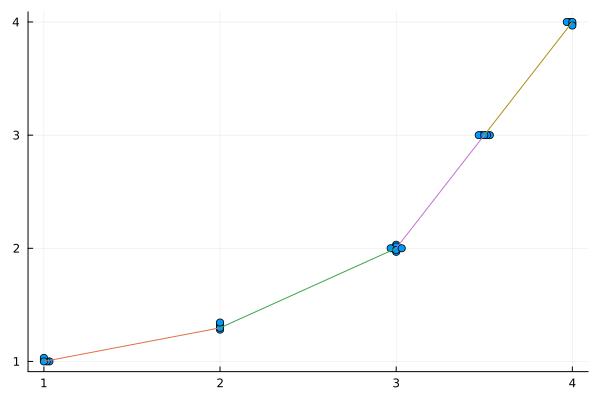

In [29]:
nodeDict = Paths.resetNodes(sourceNode, path)
display(scatterNodes(nodeDict))
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)
path = reverse(Paths.toArray(Paths.astar(sourceNode, nodeDict[target])))
drawPath(source, path, scatterNodes(nodeDict))